# Behavioral Lab 2

Welcome to our second lab! 

Last week, we discussed some background related to the COVID-19 pandemic and saw some datasets. 

### Today's lab (Please go through the Lecture Notes first)

* Differential Equations
* S-I-R Model

# 1 Recall SIR Model

Remember, Python code in one moduel gains access to the code in another module by the process of importing it.

```python
import numpy as np
import pandas as pd
```

In [1]:
import numpy as np
import pandas as pd

from scipy.integrate import odeint
import matplotlib.pyplot as plt

Recall in the SIR model, we have the effective contact rate and the recovery rate:

$effective\_contact\_rate = risk\_of\_infection \cdot contact\_rate$

$recovery\_rate = 1/days$

If an infected person meet 2 people per day, 100% rate of infection, what's the effective contact rate? And if the person takes 6 days to recover, the recovery rate is 1/6.

R0: the basic reproductive rate. R0 = effective contact rate/recover rate = 12.

Note: R0 > 1, the disease will spread. R0 < 1, the disease will die out.

Recall the differential equations.  In python, we usually put our introduced models (SIR model) into a function, and later we call it.

# 2. Function

A function is a block of code which only runs when it is called. In Python a function is defined using the `def` keyword.

In [2]:
def my_function():
    print("Hello from a function")

When we call it, just type:

In [3]:
my_function()

Hello from a function


We can also add argument in the function. Arguments are specified after the function name, inside the parentheses. You can add as many arguments as you want, just separate them with a comma.

In [4]:
def my_function(x):
    return 5*x

When we call it, we can put certain value for `x` in the above function:

In [5]:
print(my_function(3))

15


x is the argument of the function. Arguments are specified after the function's name, inside the parentheses. You can add more than 1 argument, just separate them with a comma.

To let a function return a value, use the `return` statement.

In [6]:
def model(y,t):
    k = 0.3
    dydt = -y * k
    return dydt

In [7]:
y0 = 5
t = np.linspace(0,20)

## 2.1. `odeint`

Recall the `odeint` function we reviewed in class, it contains three arguments, model, initial stages, time:

In [8]:
y = odeint(model, y0, t)

In [11]:
# y

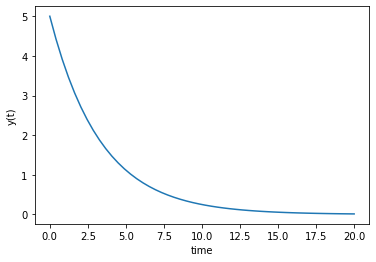

In [12]:
# plot results

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

We can complicate the model with additional arguments:

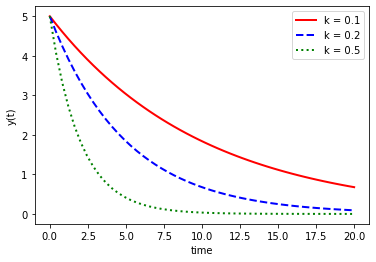

In [13]:
def model(y,t,k):
    dydt = -k * y
    return dydt

y0 = 5
t = np.linspace(0,20)

k= 0.1
y1 = odeint(model,y0,t,args=(k,))
k= 0.2
y2 = odeint(model,y0,t,args=(k,))
k= 0.5
y3 = odeint(model,y0,t,args=(k,))

plt.plot(t, y1, 'r-', linewidth= 2, label = 'k = 0.1')
plt.plot(t, y2, 'b--', linewidth= 2, label = 'k = 0.2')
plt.plot(t, y3, 'g:', linewidth= 2, label = 'k = 0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

args is the optional inputs in `odeint`. It allows additional information to be passed into the model function, but is a tuple sequence of value. 
Tuples are used to store multiple items, so we must have to add a comma after the item if we only have one in it. `args=(k,)`.

# 3 SIR Model

In [14]:
def deriv(y,t,N,beta,gamma):
    S,I,R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [15]:
effective_contact_rate = 0.2 # from 0.5
recovery_rate = 0.1
pop = 2000

recovered = 0
infected = 1
susceptible = pop - recovered - infected 

t= range(0,200)

In [16]:
covid_model = odeint(deriv,
                    [susceptible, infected, recovered],
                    t,
                    args=(pop, effective_contact_rate, recovery_rate))

In [17]:
S,I,R =covid_model.T

Note that `T` here is for transposing. 

In [18]:
covid_model[0,:] # Check the first row of covid_model

array([1.999e+03, 1.000e+00, 0.000e+00])

In [19]:
covid_model.T # Check the first row of the transposed covid_model matrix

array([[1.99900000e+03, 1.99878979e+03, 1.99855752e+03, 1.99830089e+03,
        1.99801736e+03, 1.99770412e+03, 1.99735807e+03, 1.99697580e+03,
        1.99655353e+03, 1.99608713e+03, 1.99557199e+03, 1.99500309e+03,
        1.99437486e+03, 1.99368118e+03, 1.99291532e+03, 1.99206984e+03,
        1.99113661e+03, 1.99010665e+03, 1.98897011e+03, 1.98771619e+03,
        1.98633301e+03, 1.98480756e+03, 1.98312561e+03, 1.98127157e+03,
        1.97922838e+03, 1.97697744e+03, 1.97449846e+03, 1.97176937e+03,
        1.96876613e+03, 1.96546271e+03, 1.96183088e+03, 1.95784017e+03,
        1.95345771e+03, 1.94864821e+03, 1.94337381e+03, 1.93759413e+03,
        1.93126620e+03, 1.92434451e+03, 1.91678113e+03, 1.90852581e+03,
        1.89952624e+03, 1.88972835e+03, 1.87907672e+03, 1.86751507e+03,
        1.85498694e+03, 1.84143640e+03, 1.82680897e+03, 1.81105266e+03,
        1.79411909e+03, 1.77596481e+03, 1.75655264e+03, 1.73585311e+03,
        1.71384598e+03, 1.69052166e+03, 1.66588260e+03, 1.639944

In [20]:
# Put them in a dataset for better view
sir_data = pd.DataFrame({
    'susceptible': S,
    'infected': I,
    'recovered': R,
    'days': t
})

In [21]:
sir_data # Now the above generated variables are in the following tables

,susceptible,infected,recovered,days
0,1999.000000,1.000000,0.000000,0
1,1998.789786,1.105049,0.105165,1
2,1998.557517,1.221106,0.221377,2
3,1998.300889,1.349319,0.349792,3
4,1998.017358,1.490954,0.491688,4
...,...,...,...,...
195,406.489813,0.666722,1592.843465,195
196,406.463501,0.628302,1592.908197,196
197,406.438706,0.592094,1592.969199,197
198,406.415342,0.557972,1593.026686,198


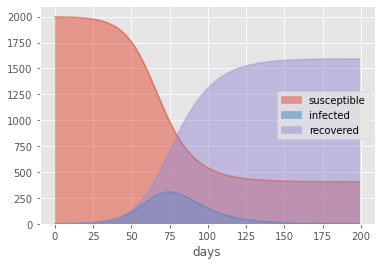

In [22]:
plt.style.use('ggplot')
sir_data.plot(x='days',
             y=['susceptible','infected','recovered'],
             kind ='area',
             stacked = False)

If we change $\beta$ to a smaller level (try it by yourself!), we can see the infected curve is getting flattened. This is the idea of having the governmental orders like shelter-in-place, because it reduced the effective contact rate.

## 3.1 Expectation of the homework question

* select a state, assume that there's no spillover (indicate your assumption) of case infection outside the state, and there're relatively stable people-contact rates. 
* Use the total population (2019) of the state as N, use infected = 1 as the intial stage. Set recovered_0 = 0. Susceptible = N - infected - recovered. 

* Find R0 for the state you selected. Recall: R0 = beta/gamma. Gamma = 1/days = 1/14 (find your own number with a citation). beta_CT = R0_CT/gamma. 

* Change beta to a lower rate after shelter-in-place or stay-at-home order. 

* Compare with the infected curve in real life (plot of cases by date for the specific state). And think why?
- spillover across the state
- different contact rate
- etc. 

Why SIR might be not the perfect model under covid.